In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/metaverse_transactions_dataset_metaverse_transactions_dataset.csv')
dataset.head(3)

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3.0,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5.0,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3.0,74,focused,established,31.25,low_risk


In [ ]:
dataset.shape

(30741, 14)

In [ ]:
dataset["anomaly"].unique()

array(['low_risk', 'moderate_risk', nan, 'high_risk'], dtype=object)

anomaly
low_risk         24814
moderate_risk     3375
high_risk         2530
Name: count, dtype: int64


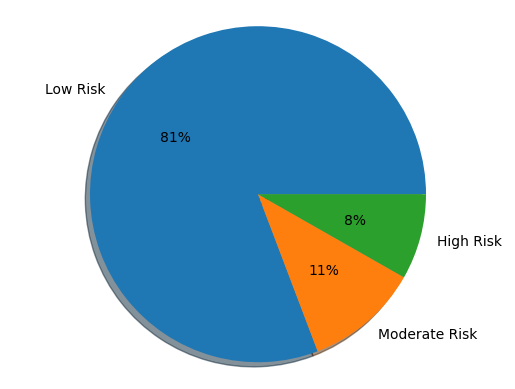

In [ ]:

print(dataset["anomaly"].value_counts())
x,y,z = dataset['anomaly'].value_counts()
classs = [x, y, z]
class_labels = ["Low Risk", "Moderate Risk", "High Risk"]
plt.pie(classs, labels = class_labels, autopct = '%0.0f%%', shadow = True)
plt.axis("equal")
plt.show()

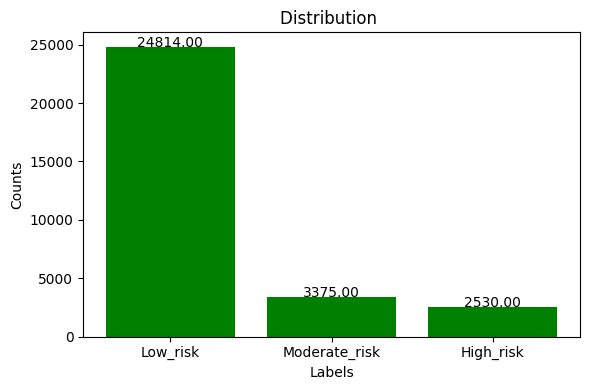

In [ ]:
x,y,z = dataset['anomaly'].value_counts()

labels = ["Low_risk","Moderate_risk","High_risk"]
counts = [x,y,z]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color='green')

plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution ')


for i, value in enumerate(counts):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()

In [ ]:
dataset.isnull().sum()

timestamp             0
hour_of_day           0
sending_address       0
receiving_address     0
amount               11
transaction_type      0
location_region       0
ip_prefix             0
login_frequency      28
session_duration      0
purchase_pattern      0
age_group             0
risk_score            0
anomaly              22
dtype: int64

In [ ]:
print("Shape of dataframe before dropping:", dataset.shape)
dataset = dataset.drop(["timestamp"], axis = 1)
dataset = dataset.dropna(axis = 0, subset = ['anomaly'])
print("Shape after dropping:", dataset.shape)

Shape of dataframe before dropping: (30741, 14)
Shape after dropping: (30719, 13)


In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(dataset[['amount']])

dataset['amount'] = impute.transform(dataset[['amount']])

impute.fit(dataset[['login_frequency']])

dataset['login_frequency'] = impute.transform(dataset[['login_frequency']])

dataset.isnull().sum()

hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30719 entries, 0 to 30740
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_of_day        30719 non-null  int64  
 1   sending_address    30719 non-null  object 
 2   receiving_address  30719 non-null  object 
 3   amount             30719 non-null  float64
 4   transaction_type   30719 non-null  object 
 5   location_region    30719 non-null  object 
 6   ip_prefix          30719 non-null  float64
 7   login_frequency    30719 non-null  float64
 8   session_duration   30719 non-null  int64  
 9   purchase_pattern   30719 non-null  object 
 10  age_group          30719 non-null  object 
 11  risk_score         30719 non-null  float64
 12  anomaly            30719 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 3.3+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
for i in dataset.columns:
  x = dataset[i].dtypes
  x = str(x)
  if x == 'object':
    dataset[i] = enc.fit_transform(dataset[i])

dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 30719 entries, 0 to 30740
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_of_day        30719 non-null  int64  
 1   sending_address    30719 non-null  int64  
 2   receiving_address  30719 non-null  int64  
 3   amount             30719 non-null  float64
 4   transaction_type   30719 non-null  int64  
 5   location_region    30719 non-null  int64  
 6   ip_prefix          30719 non-null  float64
 7   login_frequency    30719 non-null  float64
 8   session_duration   30719 non-null  int64  
 9   purchase_pattern   30719 non-null  int64  
 10  age_group          30719 non-null  int64  
 11  risk_score         30719 non-null  float64
 12  anomaly            30719 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 3.3 MB


<Axes: >

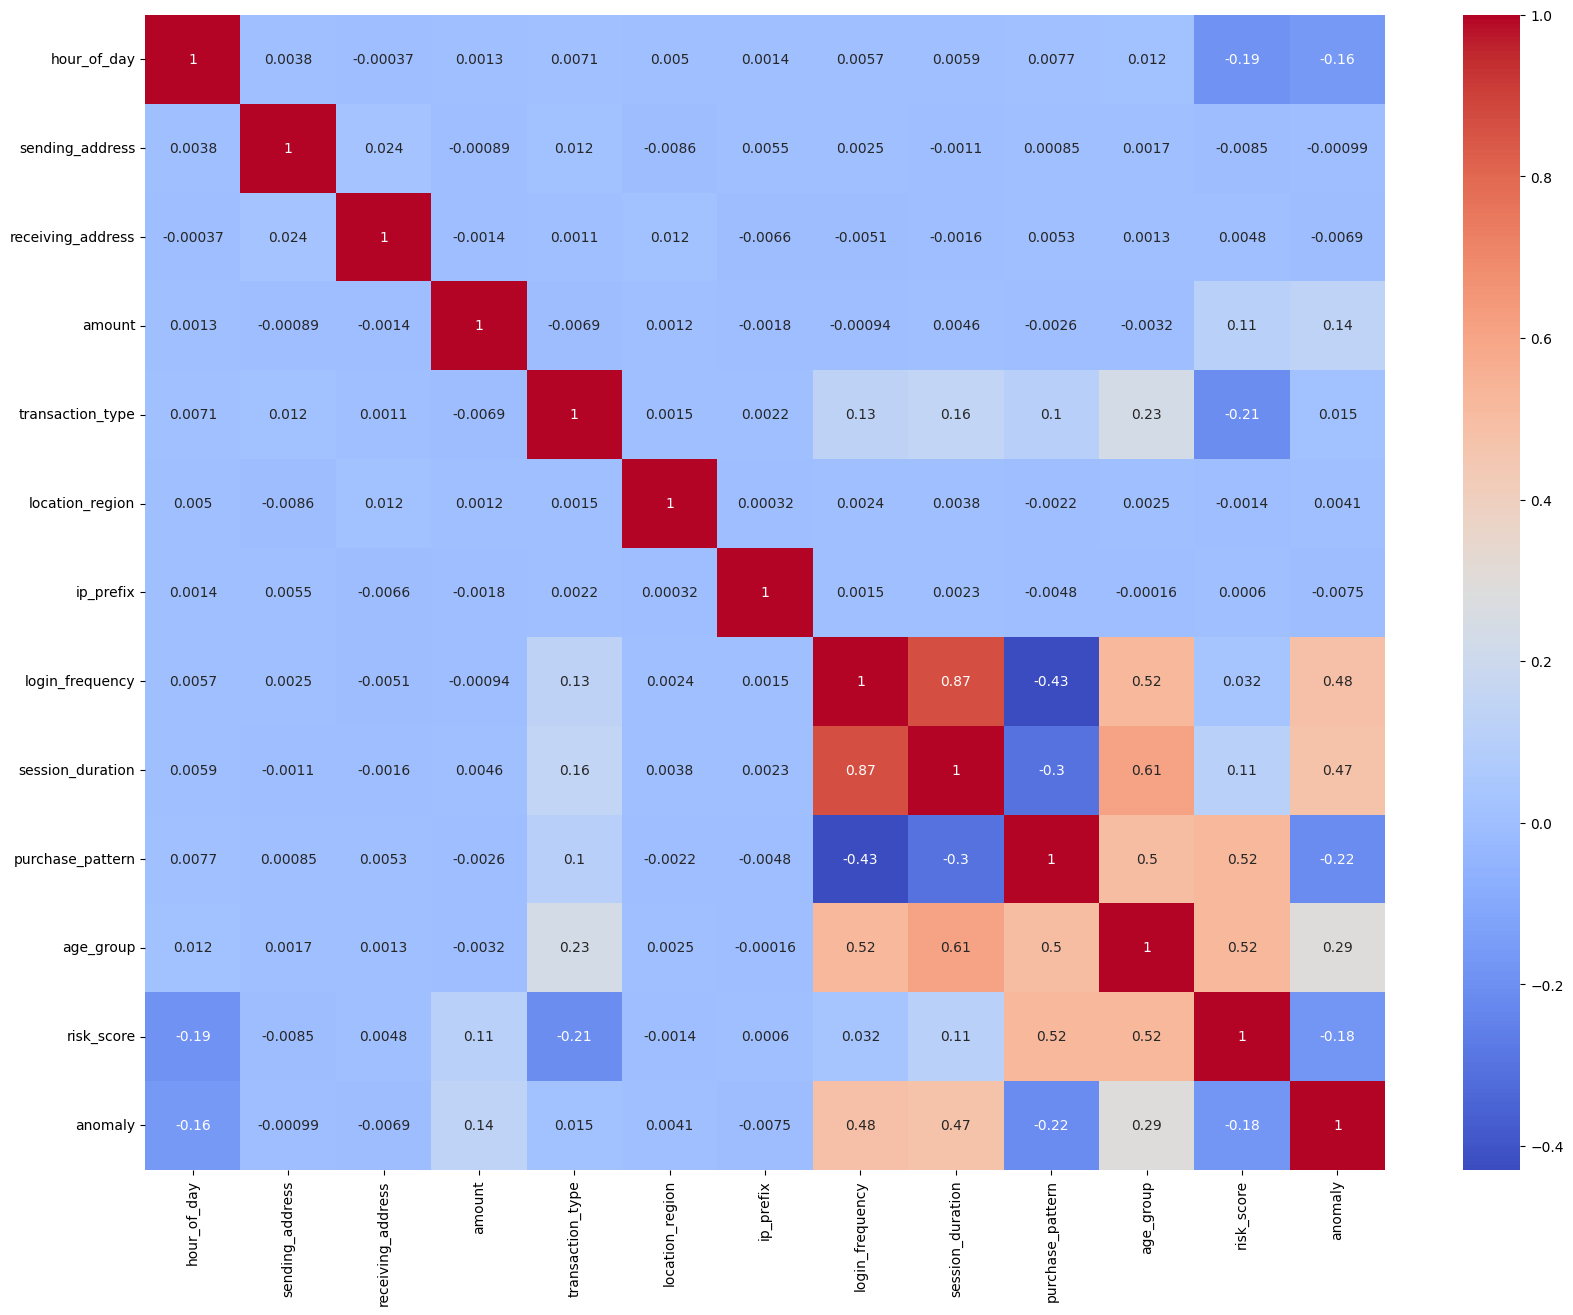

In [ ]:
corr=dataset.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(dataset, 0.8)
print(corr_features)

{'session_duration'}


In [ ]:
x=dataset.drop(columns=['session_duration','anomaly'],axis=1)
y=dataset['anomaly']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state=0,stratify=y)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

X_train = X_train_scaled
X_test = X_test_scaled


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()


knn.fit(X_train, y_train)


print("Scaled test set accuracy: {:.2f}".format(
    knn.score(X_test, y_test)))
knn_acc = knn.score(X_test, y_test)

y_pred = knn.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Scaled test set accuracy: 0.99
Test set score: 0.99


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
dt_acc=accuracy_score(y_pred,y_test)
print("Scaled test set accuracy: {:.2f}".format(
    dt_acc))

y_pred = clf.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Scaled test set accuracy: 1.00
Test set score: 1.00


In [ ]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()

gnb.fit(X_train, y_train)

print("Scaled test set accuracy: {:.2f}".format(
    gnb.score(X_test, y_test)))

nb_acc = gnb.score(X_test, y_test)

y_pred = gnb.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Scaled test set accuracy: 0.86
Test set score: 0.86


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x,y,test_size = 0.30, random_state=0)
scaler = MinMaxScaler()
scaler.fit(X1_train)
X1_train_scaled = scaler.transform(X1_train)

scaler.fit(X1_test)
X1_test_scaled = scaler.transform(X1_test)

X1_train = X1_train_scaled
X1_test = X1_test_scaled
gnb = GaussianNB()

gnb.fit(X1_train, y1_train)

print("Scaled test set accuracy: {:.2f}".format(
    gnb.score(X1_test, y1_test)))

nb_acc_non_strat = gnb.score(X1_test, y1_test)

y1_pred = gnb.predict(X1_test)
print("Test set score: {:.2f}".format(np.mean(y1_pred == y1_test)))


Scaled test set accuracy: 0.87
Test set score: 0.87


<ipython-input-97-6684353f179b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classifier', y='Accuracy', data=accuracy_df, palette='Set1')


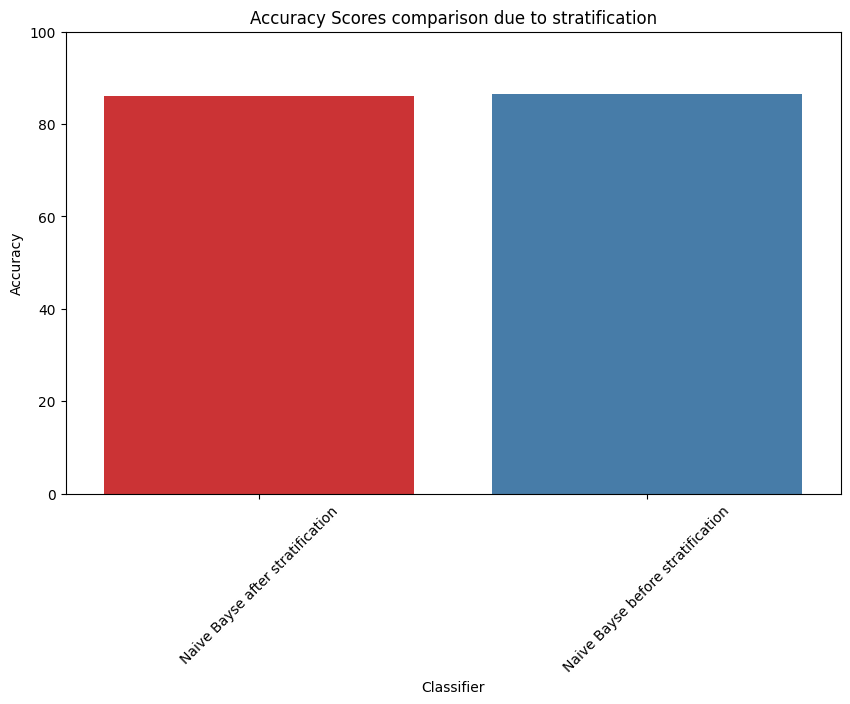

In [ ]:
classifier_names = ["Naive Bayse after stratification","Naive Bayse before stratification"]
accuracy_scores =[i*100 for i in [nb_acc,nb_acc_non_strat]]
accuracy_df = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracy_scores})

plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=accuracy_df, palette='Set1')
plt.title('Accuracy Scores comparison due to stratification')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from itertools import cycle
def classification_check(model,X,y,x_train, x_test, y_train, y_test):
    model1 = model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test,y_test))
    score=cross_val_score(model,X,y,cv=5)
    print(score)
    print('CV Score:',np.mean(score))
    y_pred1=model1.predict(x_test)
    cf=classification_report(y_test,y_pred1)
    print(cf)


from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classification_check(model,x,y,X_train, X_test, y_train, y_test)


Accuracy: 0.9932725694444444
[0.83821615 0.83138021 0.83658854 0.83544922 0.83932932]
CV Score: 0.8361926865012345
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       759
           1       0.99      1.00      1.00      7444
           2       0.99      0.95      0.97      1013

    accuracy                           0.99      9216
   macro avg       0.99      0.98      0.99      9216
weighted avg       0.99      0.99      0.99      9216



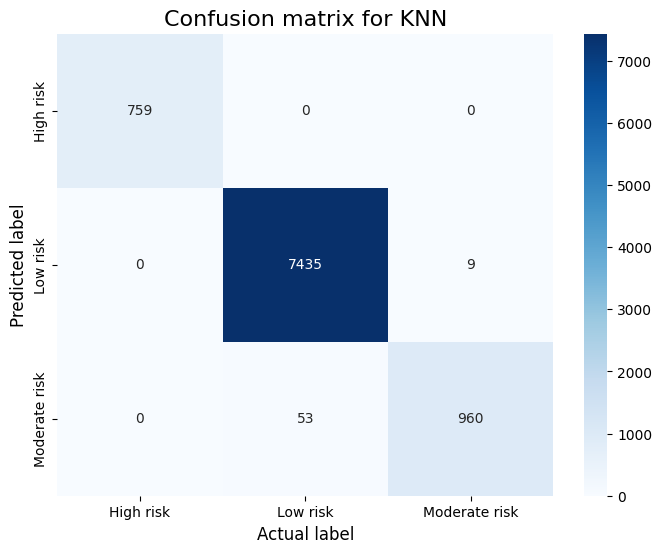

In [ ]:
def plot_confusion_matrix(model, X_test, y_test):

    sentiment_classes = ['High risk', 'Low risk', 'Moderate risk']

    y_pred = model.predict(X_test)
    cm = confusion_matrix(np.array(y_test), y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix for KNN', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)


plot_confusion_matrix(model, X_test, y_test)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from itertools import cycle
def classification_check(model,X,y,x_train, x_test, y_train, y_test):
    model1 = model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test,y_test))
    score=cross_val_score(model,X,y,cv=5)
    print(score)
    print('CV Score:',np.mean(score))
    y_pred1=model1.predict(x_test)
    cf=classification_report(y_test,y_pred1)
    print(cf)



model = DecisionTreeClassifier()
classification_check(model,x,y,X_train, X_test, y_train, y_test)

Accuracy: 1.0
[1. 1. 1. 1. 1.]
CV Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       759
           1       1.00      1.00      1.00      7444
           2       1.00      1.00      1.00      1013

    accuracy                           1.00      9216
   macro avg       1.00      1.00      1.00      9216
weighted avg       1.00      1.00      1.00      9216



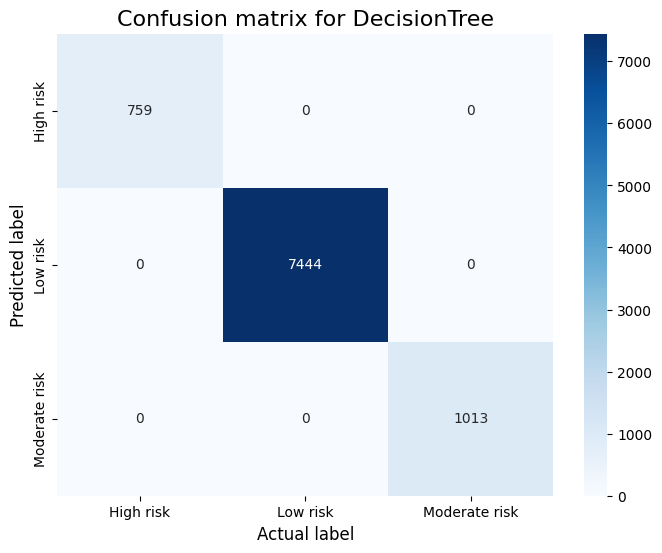

In [ ]:
def plot_confusion_matrix(model, X_test, y_test):


    sentiment_classes = ['High risk', 'Low risk', 'Moderate risk']

    y_pred = model.predict(X_test)
    cm = confusion_matrix(np.array(y_test), y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix for DecisionTree', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)


plot_confusion_matrix(model, X_test, y_test)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from itertools import cycle
def classification_check(model,X,y,x_train, x_test, y_train, y_test):
    model1 = model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test,y_test))
    score=cross_val_score(model,X,y,cv=5)
    print(score)
    print('CV Score:',np.mean(score))
    y_pred1=model1.predict(x_test)
    cf=classification_report(y_test,y_pred1)
    print(cf)


from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classification_check(model,x,y,X_train, X_test, y_train, y_test)

Accuracy: 0.861328125
[0.86279297 0.86311849 0.86507161 0.8680013  0.86000326]
CV Score: 0.8637975261476478
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       759
           1       0.99      0.83      0.91      7444
           2       0.44      0.95      0.60      1013

    accuracy                           0.86      9216
   macro avg       0.81      0.93      0.84      9216
weighted avg       0.93      0.86      0.88      9216



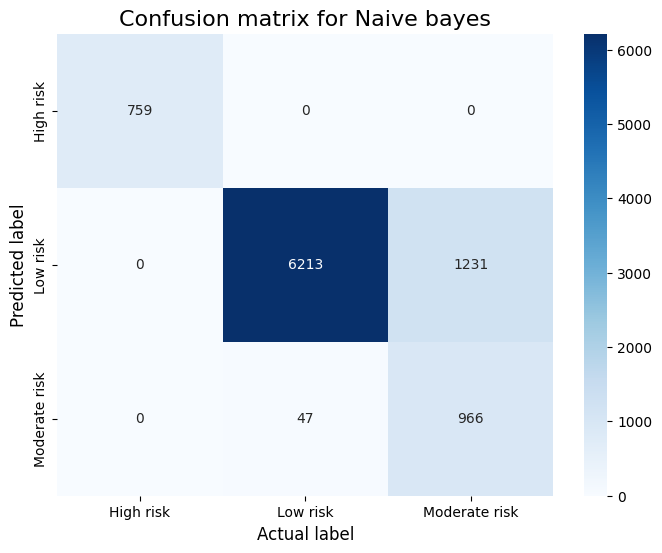

In [ ]:
def plot_confusion_matrix(model, X_test, y_test):

    sentiment_classes = ['High risk', 'Low risk', 'Moderate risk']
    y_pred = model.predict(X_test)
    cm = confusion_matrix(np.array(y_test), y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix for Naive bayes', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)


plot_confusion_matrix(model, X_test, y_test)


<ipython-input-104-a3db9d14d654>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Classifier', y='Accuracy', data=accuracy_df, palette='Set1')


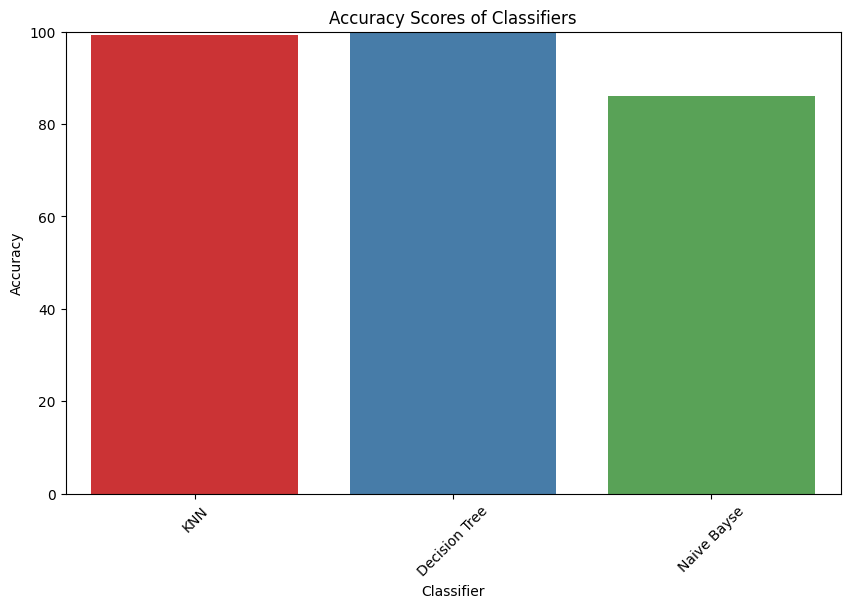

In [ ]:
classifier_names = ["KNN","Decision Tree","Naive Bayse"]
accuracy_scores =[i*100 for i in [knn_acc,dt_acc,nb_acc]]
accuracy_df = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracy_scores})

plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Accuracy', data=accuracy_df, palette='Set1')
plt.title('Accuracy Scores of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()